# Read Data

In [52]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [53]:
data_raw=pd.read_csv("healthcare-dataset-stroke-data (1).csv")

In [54]:
data_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [55]:
data_raw.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1395,48648,Female,55.0,0,0,Yes,Private,Urban,64.45,26.7,never smoked,0
2972,32430,Female,4.0,0,0,No,children,Rural,104.95,28.8,Unknown,0
2363,63450,Female,64.0,0,0,Yes,Self-employed,Rural,128.04,34.0,smokes,0
1517,66818,Male,75.0,0,0,Yes,Govt_job,Urban,98.91,24.4,never smoked,0
4688,40041,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown,0


In [56]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [57]:
data_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Clean Data

In [58]:
data_raw.drop(['id'],axis=1,inplace = True)

In [59]:
data_raw.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [60]:
data_raw.dropna(inplace=True)

data_raw.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [61]:
data_raw.shape

(4909, 11)

In [62]:
data_raw.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Xử lí ngoại lai

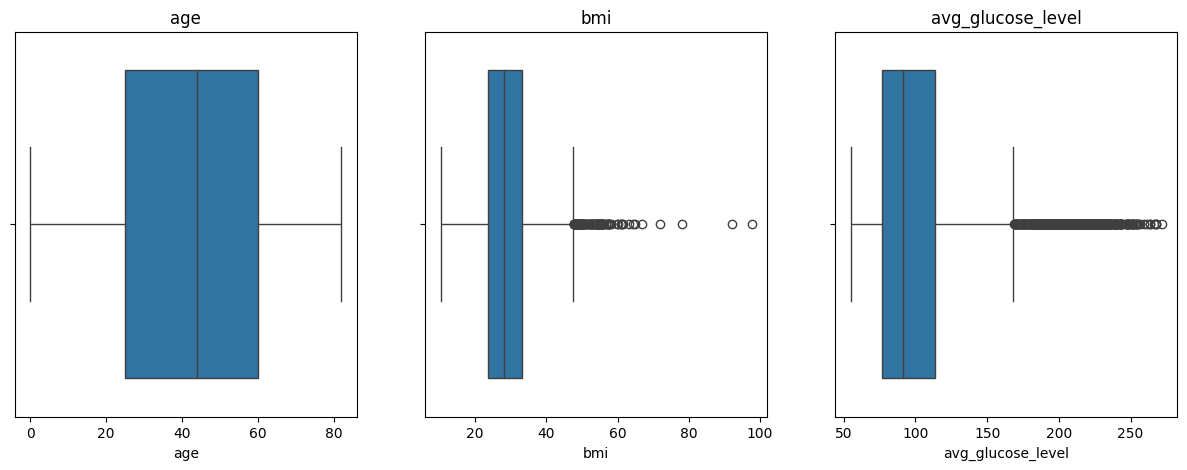

In [63]:
num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    
    sns.boxplot(x=data_raw[num_cols[i]])
    plt.title(num_cols[i])
plt.show()

In [64]:
def detect_outliers(data,column):
    q1 = data_raw[column].quantile(.25)
    q3= data_raw[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = data_raw.index[(data_raw[column] <lower_bound) | (data_raw[column] > upper_bound)]
    
    return ls

In [65]:
list = []
for column in num_cols:
    list.extend(detect_outliers(data_raw,column))
list = set(list) # set để loại bỏ các phần tử trùng lặp

In [66]:
data_raw=data_raw.drop(list)
data_raw.shape

(4260, 11)

# Data Visualization

<Axes: title={'center': 'Gender of patient'}, xlabel='gender'>

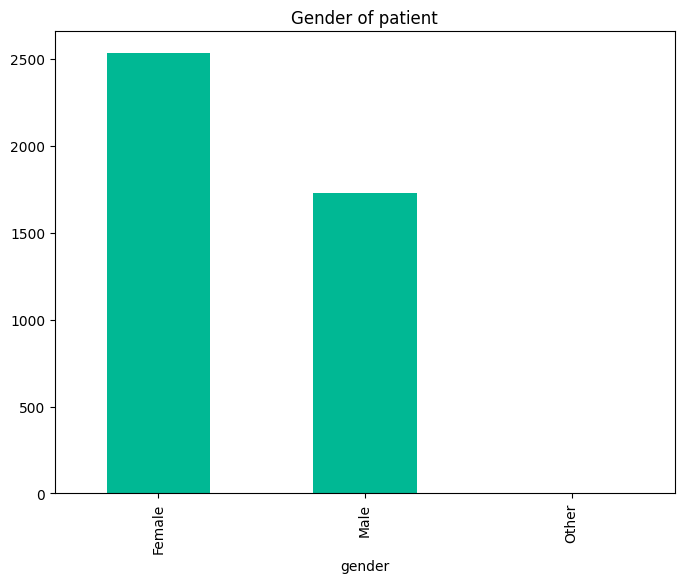

In [67]:
data_raw['gender'].value_counts().plot(figsize=(8,6),kind='bar',color='#00b894',title="Gender of patient")

Text(0.5, 1.0, "Distribution of patients' gender ")

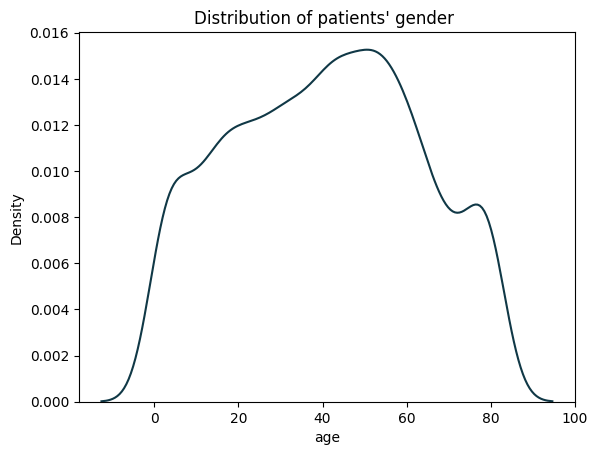

In [68]:

sns.kdeplot(data_raw['age'] , color = '#103846')
plt.title('Distribution of patients\' gender ')


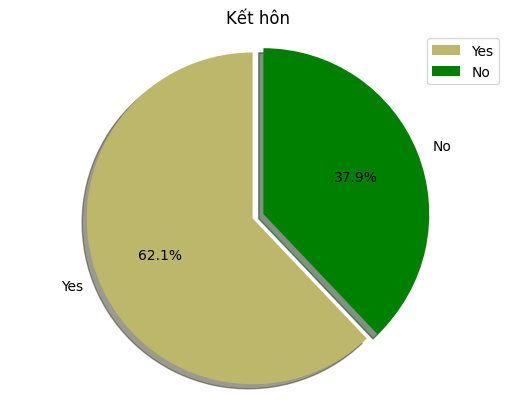

In [69]:
yes = data_raw['ever_married'][data_raw['ever_married']=='Yes'].count()
no = data_raw['ever_married'].value_counts().sum() - yes
labels = ['Yes','No']
sizes = [yes,no]
colors = ['#bdb76b', '#008000']
myexplode = [0.07,0]
plt.pie(sizes, labels=labels, colors=colors,explode=myexplode,shadow=True,autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Kết hôn')
plt.legend()
plt.show()

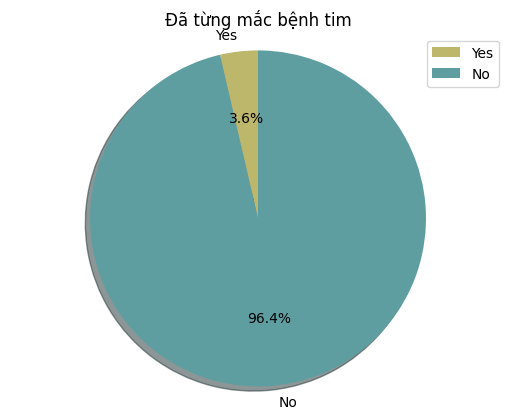

In [70]:
# Mắc bệnh tim
yes = data_raw['heart_disease'][data_raw['heart_disease']==1].count()
no = data_raw['heart_disease'].value_counts().sum() - yes
labels = ['Yes','No']
sizes = [yes,no]
colors = ['#bdb76b', '#5F9EA0']
plt.pie(sizes, labels=labels, colors=colors,shadow=True,autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Đã từng mắc bệnh tim')
plt.legend()
plt.show()

In [71]:
work_types = dict(data_raw['work_type'].value_counts())
fig = px.pie(names = work_types.keys(),values = work_types.values(),title = 'Loại công việc',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Private', 'children', 'Self-employed', 'Govt_job', 'Never_worked'],
                              dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([2415,  662,  629,  532,   22], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Loại công việc'}}
})

In [72]:
Residence_types = dict(data_raw['Residence_type'].value_counts())
fig = px.pie(names = Residence_types.keys(),values = Residence_types.values(),title = 'Nơi ở',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Urban', 'Rural'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([2160, 2100], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Nơi ở'}}
})

In [73]:
smoking_status = dict(data_raw['smoking_status'].value_counts())

fig = px.pie(names = smoking_status.keys(),values = smoking_status.values(),title = 'Tình trạng hút thuốc',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([1571, 1381,  671,  637], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Tình trạng hút thuốc'}}
})

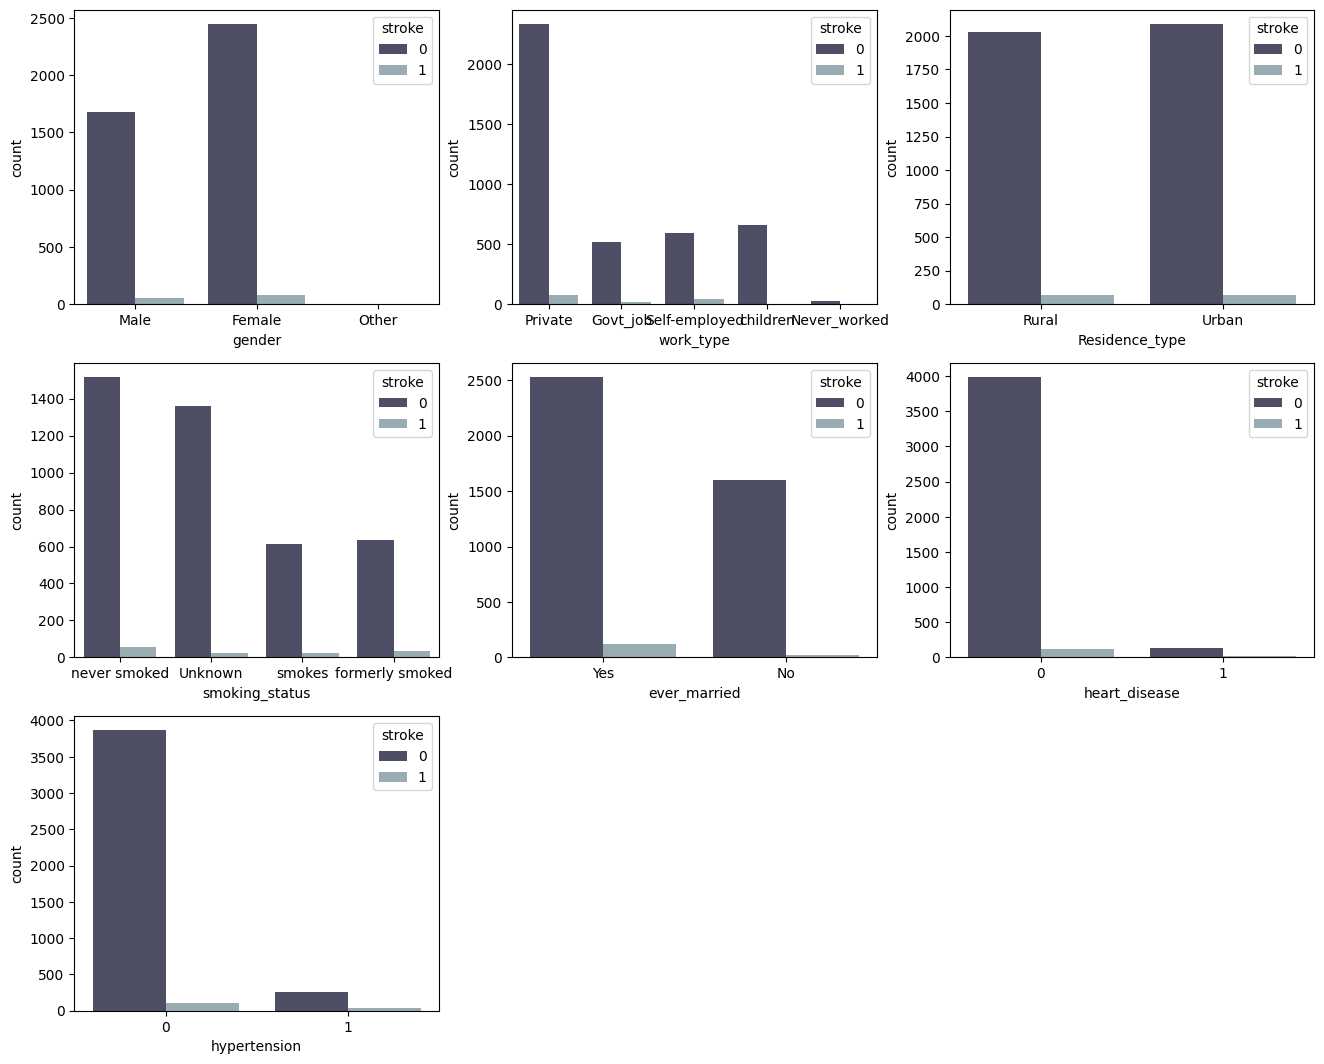

In [74]:
cols = ['gender','work_type','Residence_type','smoking_status','ever_married','heart_disease','hypertension']
plt.figure(figsize=(16,13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    
    sns.countplot(x=data_raw[cols[i]],hue = data_raw['stroke'],palette = 'bone')

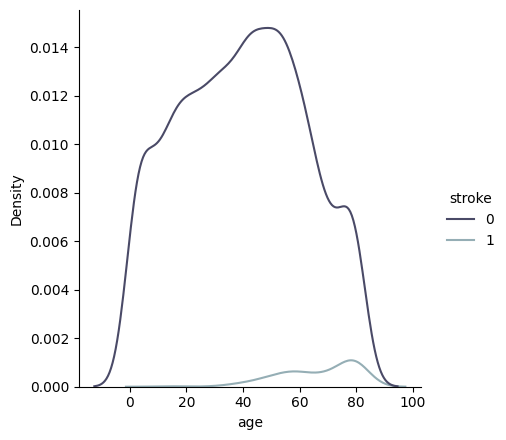

In [75]:
sns.displot(data = data_raw , x='age',hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
plt.show()

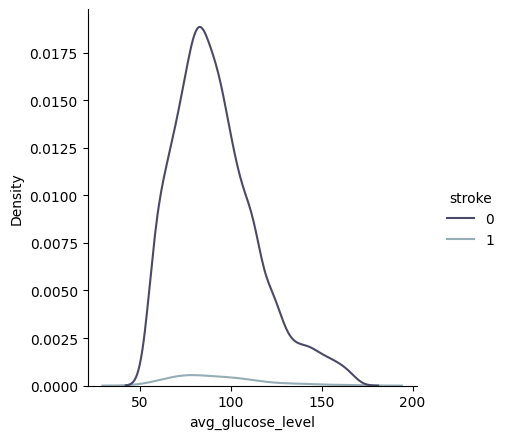

In [76]:
sns.displot(data = data_raw , x='avg_glucose_level',hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
plt.show()

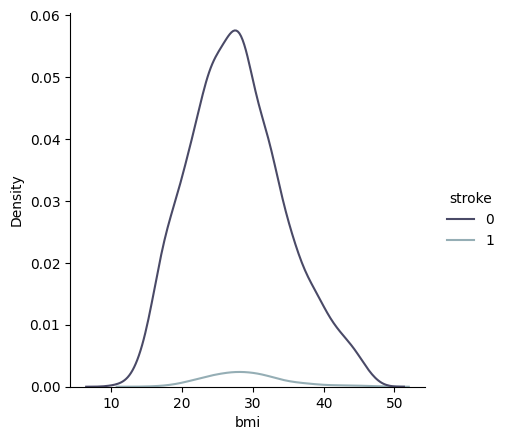

In [77]:
sns.displot(data = data_raw , x='bmi',hue = 'stroke',kind = 'kde',palette = 'bone',height=4.5 )
plt.show()

In [78]:
stroke = dict(data_raw['stroke'].value_counts())

fig = px.pie(names = stroke.keys(),values = stroke.values(),title = 'Xảy ra đột quỵ',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array([0, 1], dtype=int64),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([4124,  136], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Xảy ra đột quỵ'}}
})

## Dữ liệu mất cân bằng

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier 
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier 

# Data Preprocessing

## Làm dữ liệu cân bằng

In [80]:
df_0 = data_raw[data_raw.iloc[:,-1]==0]
df_1 = data_raw[data_raw.iloc[:,-1]==1]

data_raw['stroke'].value_counts()

stroke
0    4124
1     136
Name: count, dtype: int64

In [81]:
df_1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
240,Male,66.0,0,0,Yes,Private,Rural,76.46,21.2,formerly smoked,1
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [82]:
from sklearn.utils import resample

df_1 = resample(df_1,replace=True , n_samples=df_0.shape[0] , random_state=123 )


In [83]:
df = np.concatenate((df_0,df_1))

#create the balanced dataframe
df = pd.DataFrame(df)
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']

# visualize balanced data 
stroke = dict(df['stroke'].value_counts())
fig = px.pie(names = ['False','True'],values = stroke.values(),title = 'Stroke Occurance',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['False', 'True'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'values': array([4124, 4124], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(36, 86, 104), rgb(15, 114, 121), rgb(13, 143,
                               129), rgb(57, 171, 126), rgb(110, 197, 116),
                               rgb(169, 220, 103), rgb(237, 239, 93)],
               'template': '...',
               'title': {'text': 'Stroke Occurance'}}
})

In [84]:
df['stroke'].value_counts()

stroke
0    4124
1    4124
Name: count, dtype: int64

## Encoding Data

In [85]:
df = pd.get_dummies(data =df , columns =  ['gender','ever_married','work_type','Residence_type','smoking_status'] ,drop_first=True )

In [86]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,True,False,False,False,False,False,True,False,False,False,False
1,58.0,1,0,87.96,39.2,0,True,False,True,False,True,False,False,True,False,True,False
2,8.0,0,0,110.89,17.6,0,False,False,False,False,True,False,False,True,False,False,False
3,70.0,0,0,69.04,35.9,0,False,False,True,False,True,False,False,False,True,False,False
4,14.0,0,0,161.28,19.1,0,True,False,False,True,False,False,False,False,False,False,False


In [87]:
columnss = ['gender_Male','gender_Other','ever_married_Yes','work_type_Never_worked','work_type_Private','work_type_Self-employed'
            ,'work_type_children','Residence_type_Urban','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
df[columnss] = df[columnss].astype(int)


In [88]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,1,0,0,0,0
1,58.0,1,0,87.96,39.2,0,1,0,1,0,1,0,0,1,0,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,0,1,0,0,1,0,0,0
3,70.0,0,0,69.04,35.9,0,0,0,1,0,1,0,0,0,1,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,1,0,0,0,0,0,0,0


## Chia dữ liệu

In [89]:
x = df.drop('stroke',axis=1)
y = pd.to_numeric( df['stroke'])

## Data Scaling

In [90]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [91]:
x

array([[-2.1985421 , -0.41503851, -0.29903203, ..., -0.50896407,
        -0.79192512, -0.4366956 ],
       [ 0.21028386,  2.40941498, -0.29903203, ..., -0.50896407,
         1.26274565, -0.4366956 ],
       [-1.97955792, -0.41503851, -0.29903203, ..., -0.50896407,
        -0.79192512, -0.4366956 ],
       ...,
       [ 1.17381424,  2.40941498, -0.29903203, ..., -0.50896407,
         1.26274565, -0.4366956 ],
       [ 1.04242373, -0.41503851, -0.29903203, ..., -0.50896407,
         1.26274565, -0.4366956 ],
       [ 0.73584588,  2.40941498, -0.29903203, ...,  1.96477525,
        -0.79192512, -0.4366956 ]])

## Chia dữ liệu thành tập train và tập test

In [92]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = .20)

# Xây dựng mô hình

## Decision Tree

In [93]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [94]:
y_pred = tree_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9854545454545455

#### Cây quyết định cho độ chính xác khoảng 98%

## Knearest Neighbor

In [95]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9745454545454545

#### Knearest Neighbor cho độ chính xác khoảng 97%

## Support Vector Machine

In [97]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [98]:
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.8836363636363637

#### SVM cho độ chính xác khoảng 88%

## Naive Bayes

In [99]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [100]:
y_pred=nb.predict(x_test)
accuracy_score(y_test,y_pred)

0.593939393939394

#### Navie Bayes cho độ chính xác khá thấp

## Logistic Regression

In [101]:
logic_model = LogisticRegression()
logic_model.fit(x_train,y_train)

LogisticRegression()

In [102]:
y_pred=logic_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7921212121212121

#### Logistic regression cho độ chính xác khá thấp

# So sánh hiệu suất của các mô hình

In [108]:
performance = {"Model" :["Decision Tree" , "K-nearist Neighbour", "SVM", "Logistic Regression" ,"Naive Bayes"],
               "performance" : [0.985  ,0.974   ,0.883 ,0.792,0.593]}

performance = pd.DataFrame(performance)

C:\Users\ACER\AppData\Local\Temp\ipykernel_10988\1275507516.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Model', ylabel='performance'>

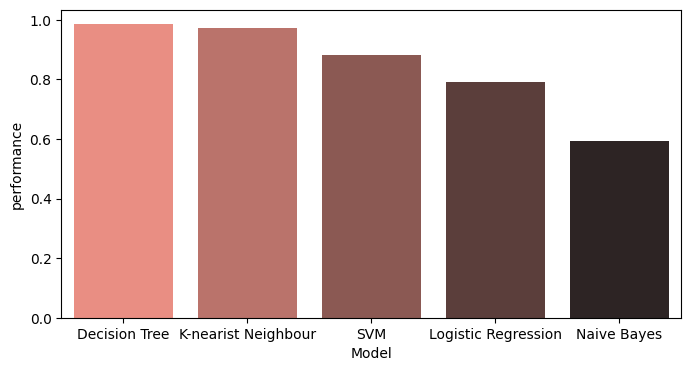

In [109]:
plt.figure(figsize=(8,4))
sns.barplot(data = performance , x = "Model" , y = "performance" ,palette="dark:salmon_r")